# MA934 - class 4

## Deadline: 12:00 noon on Thursday 3 November 

You should make at least one commit to your repository per computational task below - usually more.

For this assignment, you must create a new Jupyter notebook called MA934_Class4_UniID.ipynb to contain the implementations that you write. You can separate out individual tasks if you prefer, but the full submission should be made as a single .zip via [our website](https://warwick.ac.uk/fac/sci/mathsys/courses/msc/ma934/resources/assessedwork/ma934declaration). The platform will not allow you to upload more than one file.

A few tips:
- please make sure to debug intermediate outputs as you code along. You are welcome to design smaller test cases and toy problems to verify your work (even if they are not part of the final submission).
- consider possible forms of input or arguments and make sure your solution can cope with *interesting* cases.
- do not forget to comment your code and use Markdown cells to explain what you are doing. A perfectly functional solution with no information about the thought process will not receive more than a subset of the points (~$70\%$ depending on the difficulty of the problem and how transparent the algorithm flow is). 
- generally getting used to writing tidy solution is good practice. Feel free to use [online resources](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet) for editing guidance.

## Task 1 - Solving a simple linear programme

In [2]:
# Import libraries
import time
import numpy as np
from numpy import linalg as la
import random
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

Vertices $(x_1, x_2)$ are found by finding the points of intersections between those lines which intersect

In [3]:
vertices = np.array([[6,28],[24,22],[228/7,70-2*228/7],[12,10]])
print(vertices)

[[ 6.         28.        ]
 [24.         22.        ]
 [32.57142857  4.85714286]
 [12.         10.        ]]


Plotting the search space. The feasible set is defined as the paralellogram whose vertices are black dots 

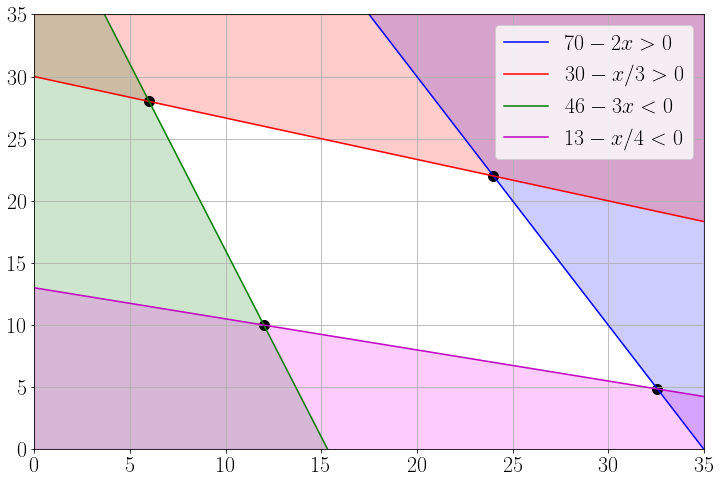

In [4]:
# reasonable search space for x1 is (0,35) from constraint 1
x = np.arange(0.0, 35.01, 0.1)

# defining functions returning the four constraints in terms of x2
def f1(inputlist):
    return [70.0 - 2.0*i for i in inputlist]

def f2(inputlist):
    return [30.0 - i/3.0 for i in inputlist]

def f3(inputlist):
    return [46.0 - 3.0*i for i in inputlist]

def f4(inputlist):
    return [13.0 - i/4.0 for i in inputlist]


# Plot inequalities
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12, 8))

plt.plot(x, f1(x), "b-", label = "$70-2x>0$")
plt.fill_between(x, f1(x), 35.0, color='blue', alpha=.2)

plt.plot(x, f2(x), "r-", label = "$30-x/3>0$")
plt.fill_between(x, f2(x), 35.0, color='red', alpha=.2)

plt.plot(x, f3(x), "g-", label = "$46-3x<0$")
plt.fill_between(x, 0.0, f3(x), color='green', alpha=.2)

plt.plot(x, f4(x), "m-", label = "$13-x/4<0$")
plt.fill_between(x, 0.0, f4(x), color='magenta', alpha=.2)

# points of intersection encompassing paralellogram
plt.scatter(vertices[:,0], vertices[:,1], color='k', s=100)

plt.legend(loc="upper right")

plt.xlim([0.0, 35.0])
plt.ylim([0.0, 35.0])

plt.grid()
plt.show()

Checking the cost function evaluated at the vertices

In [5]:
def cost(x1,x2): # cost function we aim to minimize
    return -40*x1 - 60*x2

In [6]:
for k in range(4):
    print('x1 = %.1f' % vertices[k,0])
    print('x2 = %.1f' % vertices[k,1])
    print('Cost: %.1f' % cost(vertices[k,0],vertices[k,1]))
    print('\n')

x1 = 6.0
x2 = 28.0
Cost: -1920.0


x1 = 24.0
x2 = 22.0
Cost: -2280.0


x1 = 32.6
x2 = 4.9
Cost: -1594.3


x1 = 12.0
x2 = 10.0
Cost: -1080.0




Our solution is therefore $(x_1, x_2) = (24,22)$

## Task 2 - Dantzig simplex algorithm

Write the above problem in standard form. Find a basic feasible vector in $\mathbb{R}^6$ with $x_1 = 12$ and $x_2 = 10$.

Write a code in Python that implements the Dantzig simplex algorithm in its simplest form.

Start your code from the basic feasible vector that you found above and write down the sequence of basic feasible vectors leading to the solution you found previously.

Introducing slack variables $\{s_1, s_2, s_3, s_4\}$, we write the problem as follows:

$$\min_{\substack{(x_1, x_2) \in \mathbb{R}^2} } -40\, x_1 - 60\, x_2$$

subject to the constraints

$$\begin{align*}
2 x_1 + x_2 + s_1 &= 70 \\
x_1 + 3 x_2 + s_2 &= 90 \\
3 x_1 + x_2 - s_3 &= 46 \\
x_1 + 4 x_2 - s_4 &= 52
\end{align*}$$

In standard form we are solving:

$$\min_{\substack{\mathbf{x} \in \mathbb{R}^6} } f(\mathbf{x}) = \mathbf{c}\cdot\,\mathbf{x}$$

where

$$\mathbf{c} = 
\begin{pmatrix}
-40 & -60 & 0 & 0 & 0 & 0
\end{pmatrix}$$

subject to 4 equality constraints, represented in matrix form

$$A \mathbf{x} = \mathbf{b}$$

with

$$A = 
\begin{pmatrix}
2 & 1 & 1 & 0 & 0 & 0 \\
1 & 3 & 0 & 1 & 0 & 0 \\
3 & 1 & 0 & 0 & 1 & 0 \\
1 & 4 & 0 & 0 & 0 & 1 
\end{pmatrix}$$

$$\mathbf{x} = \begin{pmatrix}
x_1 \\
x_2 \\
s_1 \\
s_2 \\
s_3 \\
s_4
\end{pmatrix}$$

and

$$\mathbf{b} = \begin{pmatrix}
70 \\
90 \\
46 \\
52
\end{pmatrix}$$

and $n$ non-negativity conditions
$$
x_1,x_2,s_1,s_2,s_3,s_4 \geq 0 .
$$

Finding a feasible vector in $\mathbb{R}^6$

In [7]:
x1 = 12
x2 = 10

#Solving backwards for s_i's
s1 = 70 - 2*x1 - x2
s2 = 90 - x1 - 3*x2
s3 = 3*x1 + x2 - 46
s4 = x1 + 4*x2 - 52

x_basic = np.array([x1,x2,s1,s2,s3,s4])
print(x_basic)

[12 10 36 48  0  0]


Dantzig simplex algorithm

## Task 3 - Gradient descent

Consider the following optimisation problem in $\mathbb{R}^n$

$$\min_{\substack{\mathbf{x} \in \mathbb{R}^n} } f(\mathbf{x})$$

where $f(\mathbf{x})$ is the quartic function defined as

$$ f(\mathbf{x}) = \frac{1}{4} \left( (\mathbf{x} - \mathbf{x}_*)^T A\cdot (\mathbf{x} - \mathbf{x}_*)\right)^2 $$

with 

$$ A = \left( 
\begin{array}{ccccc} 
\frac{\lambda+1}{2} & \frac{\lambda - 1}{2} & 0 &\ldots & 0\\ 
\frac{\lambda-1}{2} & \frac{\lambda + 1}{2} & 0 &\ldots & 0\\
0 & 0 & 1 &\ldots & 0\\ 
\vdots & \vdots & \vdots &\ddots & \vdots\\ 
0 & 0 & 0 &\ldots & 1
\end{array}
\right),
$$
$$
\mathbf{x}_* = \left( \begin{array}{c}
\sqrt{2}\\
\sqrt{3}\\
1\\
\vdots\\
1
\end{array}
\right)
$$
and $\lambda > 0$ is a parameter that controls the shape of the objective function. A reasonable range of values for $\lambda$ is $\frac{1}{10} \leq \lambda \leq 10$.

* Write down the solution of this problem.
* Write down the eigenvalues of the matrix $A$.
* Derive a formula for the gradient, $\nabla f(\mathbf{x})$, at any point in $\mathbb{R}^n$.
* Use your results to implement the gradient descent algorithm in Python. Use your algorithm to numerically solve the above problem with $n=2$ and $\lambda=2$. A good initial point is $\mathbf{x}_0 = 5\,\mathbf{x}_*$.  A good tolerance is $\varepsilon = 10\, \epsilon_m$. **Note:** You will need to write your own *Golden Section Search* code as part of this task, which is a small subproblem in itself. Make sure you verify your implementation with smaller datasets before deploying it within the context of the larger problem.
* Plot how the distance from the minimum decreases as s function of the number of iterations and empirically determine the convergence rate of the algorithm.
* Determine empirically how the number of steps required to solve the problem varies with $\lambda$ when $n=3$.

*Write down the solution of this problem*

$$\mathbf{x} = \mathbf{x}_\star$$

*Write down the eigenvalues of the matrix $A$*

$$|A - \kappa I_n| = \big{(}\frac{\lambda+1}{2} - \kappa\big{)}\big{(}\frac{\lambda+1}{2} - \kappa\big{)}(1-\kappa)...(1-\kappa) - \big{(}\frac{\lambda+1}{2}\big{)}^2(1-\kappa)...(1-\kappa) = 0$$

$$\implies (1-\kappa)...(1-\kappa)(\lambda - (\lambda+1)\kappa + \kappa^2) = 0$$

$$\implies \kappa = 1, \; \frac{\lambda+1\pm\sqrt{(\lambda-1)^2}}{2}$$

$$\implies \kappa = 1, \; \lambda$$

*Derive a formula for the gradient, $\nabla f(\mathbf{x})$, at any point in $\mathbb{R}^n$.*

*Use your results to implement the gradient descent algorithm in Python. Use your algorithm to numerically solve the above problem with $n=2$ and $\lambda=2$. A good initial point is $\mathbf{x}_0 = 5\,\mathbf{x}_\star$.  A good tolerance is $\varepsilon = 10\, \epsilon_m$. **Note:** You will need to write your own Golden Section Search code as part of this task, which is a small subproblem in itself. Make sure you verify your implementation with smaller datasets before deploying it within the context of the larger problem*

In [72]:
# inputs
n = 2
lamb = 2

# fixed point
xstar = np.ones(n)
xstar[0] = np.sqrt(2.0)
xstar[1] = np.sqrt(3.0)

# matrix
A = np.zeros((n,n))
A[0,0] = (lamb+1)/2
A[1,1] = (lamb+1)/2
A[0,1] = (lamb-1)/2
A[1,0] = (lamb-1)/2

# quartic function to be minimised and its corresponding gradient
def f(x):
    global A, xstar
    r = x-xstar
    return 0.25*(np.transpose(r)@A@r)**2

def df(x):
    global A, xstar
    r = x-xstar
    return (np.transpose(r)@A@r)*(A@r)

Custom Golden Search algorithm which will be needed to perform line minimisation

In [102]:
def GoldenSearch(f, interval, tol, search_min=True):
    # function which searches for extrema of f(x) via a bracketing-and-bisection method
    # triple = (a c b) must bracket the minimum such that f(c) < f(a) and f(c) < f(b)
    
    pm = 1
    if search_min == False:
        pm = -1 # if we wish to search for a maximum of f(x) we must find minimum of -f(x)
    
    [a, b] = interval

    # choosing c (makes (c, b) the larger interval)
    phi_p = (np.sqrt(5) + 1)/2
    phi_m = (np.sqrt(5) - 1)/2
    p = (b - a)/phi_p
    c = a + p*phi_m

    if pm*f(c) >= pm*f(a) or pm*f(c) >= pm*f(b): # sanity check input is bracketed
        c = b - p*phi_m
        
    while b - c > tol:
        x = a + b - c
        trial = f(x)
        print('a = %.3f' % a)
        print('c = %.3f' % c)
        print('x = %.3f' % x)
        print('b = %.3f' % b)
        print('f(a) = %.3f' % f(a))
        print('f(c) = %.3f' % f(c))
        print('f(x) = %.3f' % f(x))
        print('f(b) = %.3f' % f(b))
        print('\n')
            
        if x > c: # points {a,c,x,b} in ascending order
            if pm*f(c) < pm*f(a) and pm*f(c) < pm*trial: # case 1
                [a, c, b] = [a, c, x]
                
            elif pm*trial < pm*f(c) and pm*trial < pm*f(b): # case 2
                [a, c, b] = [c, x, b]
                    
        else: # points {a,x,c,b} in ascending order
            if pm*trial < pm*f(a) and pm*trial < pm*f(c): # case 1
                [a, c, b] = [a, x, c]
                
            elif pm*f(c) < pm*trial and pm*f(c) < pm*f(b): # case 2
                [a, c, b] = [x, c, b]
        
    return c

[7.07106781 8.66025404]
[-0.67053582 -0.74187716]


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.00

f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b

f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) =

f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) 

f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b

f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b

f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) =

x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100


f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) 

a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) 

a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) 

f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b

c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593




x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100



a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b)

f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b



a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b

f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b

f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c)

b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219



a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b)

c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593




a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) 

f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) 

a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) 

f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b

x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100


c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593




f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b

f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b

f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) 



a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b

a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) 

x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100


b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) 

f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c)

x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100


f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b

f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c)


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b)

x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100


b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219


b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219


c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593




x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100


f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b

c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593




a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) 


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b)

f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b

x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) 

b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219


b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219




a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b

c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593





a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b) = 1.593


a = 0.100
c = 6.219
x = 3.881
b = 10.000
f(a) = 6056.550
f(c) = 54.739
f(x) = 648.839
f(b)

KeyboardInterrupt: 

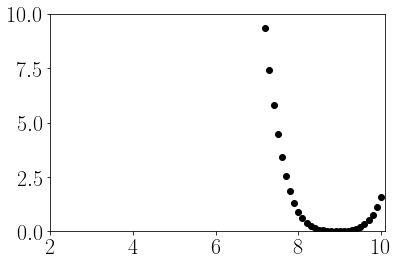

In [103]:
# initial guess
xn = 5*xstar

# position vector
vn = -df(xn)/la.norm(df(xn))
print(xn)
print(vn)
print('\n')
def line_minimiser(lamb):
    # function which performs line minimisation of f when implemented into Standard Search
    #global xn, vn
    return f(xn + lamb*vn)

lambs = np.arange(0.1,10.1,0.1)
for i in lambs:
    plt.scatter(i,f(xn+i*vn),color='k')
    plt.xlim(2,10.1)
    plt.ylim(0,10)
lamb_min = GoldenSearch(line_minimiser, [0.1,10], 1e-4)

for i in range(10):
    xn = xn + lamb_min*vn
    vn = -df(xn)/la.norm(df(xn))
    print(lamb_min)
    print(xn)
    print(xn-xstar)
    print(vn)
    print('\n')

## Task 4 - Stochastic gradient descent

Consider the following linear model expressing a noisy relationship between a target variable, $y \in \mathbb{R}$ and a set of predictor variables, $\mathbf{x} \in \mathbb{R}^n$:

$$ y = \mathbf{\alpha}^T \, \mathbf{x} + \xi $$

where $\mathbf{\alpha} \in \mathbb{R}^n$ is a set of parameters and $\xi \sim N(0, \sigma^2)$ is a normal random variable with mean 0 and variance $\sigma^2$ representing the error. We are given a set of $m$ observations

$$Y = \left\{(\mathbf{x}^{(i)},\, y^{(i)})\ : i=1\ldots m \right\}$$

Our task is to find the "best" set of parameters, $\mathbf{\alpha}_*$ given the observations by solving the ordinary least squares problem:

$$\mathbf{\alpha}_* = \min_{\substack{\mathbf{\alpha} \in \mathbb{R}^n} } F(\mathbf{\alpha}\, |\, Y)$$

where

$$ F(\mathbf{\alpha}\, |\, Y) = \frac{1}{2}\, \frac{1}{m} \sum_{i=1}^m\left( y^{(i)} - \mathbf{\alpha}^T\,\mathbf{x}^{(i)}\right)^2$$

Create a test problem with the following specifications (obviously you can vary the parameters):

```
n=10
m=100
xmax = 10.0
sigma = 0.25
```

* Solve the problem using the gradient descent code you have written above. Due to the noise, you should not expect to recover the exact "true" value of $\alpha_*$ used to generate the test data but you should be close if the noise is not too large.
* Modify your code to do the optimisation using stochastic gradient descent and compare the results graphically.
* Fix $n=10$ and $m=250$. Compare the performance of your stochastic gradient descent algorithm with different learning rates. Can you find one that performs well?

**Hint:** for both Task 3 and Task 4 you may wish to consult [the provided resources](https://warwick.summon.serialssolutions.com/#!/search/document?ho=t&include.ft.matches=f&fvf=ContentType,Newspaper%20Article,t%7CContentType,Book%20Review,t&l=en-UK&q=Understanding%20Machine%20Learning:%20From%20Theory%20to%20Algorithms&id=FETCHMERGED-warwick_catalog_b279036183) on the module webpage, as well as [nicely explained tutorials](https://realpython.com/gradient-descent-algorithm-python/) on the subject matter. This will help you craft your own code and specialise it for the problems at hand.